<a href="https://colab.research.google.com/github/Tat-Khurtina/VTB-cnn/blob/main/test_gpu_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch
import time
import torchvision.transforms as transforms
import PIL.Image as Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write a function that loads a checkpoint and rebuilds the model

def load_checkpoint(filepath):

    checkpoint = torch.load(filepath,map_location=torch.device('cpu'))
    
    #model.load_state_dict(checkpoint['state_dict'])
    model.load_state_dict(checkpoint['state_dict'], strict=False)
    model.class_to_idx = checkpoint['class_to_idx']
    
    return model

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#print(torch.cuda.get_device_name(device))
model = models.resnet34(pretrained=True)
num_ftrs = model.fc.in_features
# replace the last fc layer with an untrained one (requires grad by default)
model.fc = nn.Linear(num_ftrs, 196)
model = model.to(device)
# Loading model
model = load_checkpoint('/content/drive/My Drive/new_car0/5mod.pth')
# Checking model i.e. should have 196 output units in the classifier
print(model)


cuda:0
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=T

In [ ]:
loader = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
classes = ['Hyundai Solaris sedan',
 'KIA Rio sedan',
 'SKODA OCTAVIA sedan',
 'Volkswagen Polo sedan',
 'Volkswagen Tiguan']

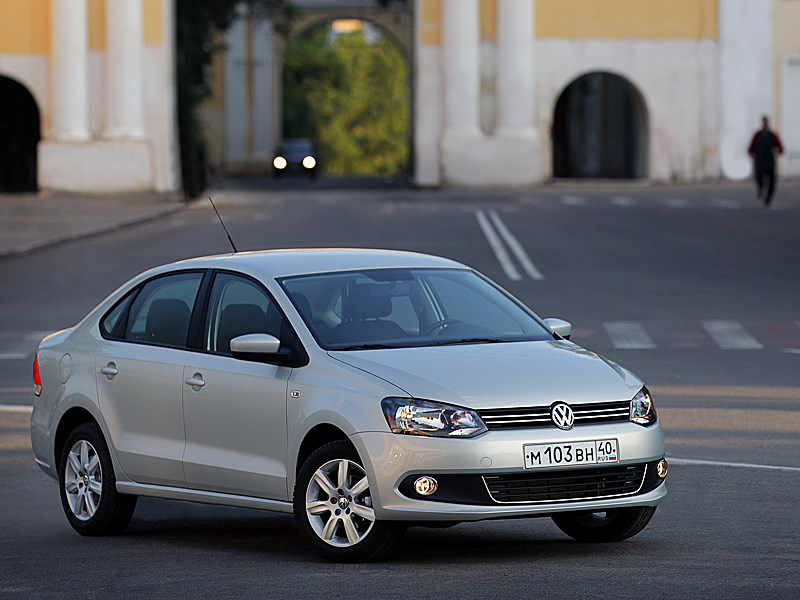

Volkswagen Polo sedan confidence:  23.758201599121094
--- 0.1993722915649414 seconds ---


In [ ]:

start_time = time.time()
imagepath = "/content/drive/My Drive/new_car0/cartt/test/Volkswagen Polo sedan/Копия 0.jpg"
image = Image.open(imagepath)
image = loader(image).float()
image = torch.autograd.Variable(image, requires_grad=True)
image = image.unsqueeze(0)
image = image.cuda()
output = model(image)
conf, predicted = torch.max(output.data, 1)
display(Image.open(imagepath))
print(classes[predicted.item()], "confidence: ", conf.item())
print("--- %s seconds ---" % (time.time() - start_time))